In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [55]:
chemin_du_repertoire = 'C:\\Users\\yvann\\OneDrive\\Documents\\Jedha\\CERTIFICATION BLOC 6'

# Changez le répertoire de travail
os.chdir(chemin_du_repertoire)

df7 = pd.read_csv("Team_Stats_Per_Game.csv")


In [56]:
df7.head()

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,NBA,Atlanta Hawks,ATL,False,82.0,242.1,43.0,92.5,0.465,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,2024,NBA,Boston Celtics,BOS,True,82.0,241.8,43.9,90.2,0.487,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,NBA,Brooklyn Nets,BRK,False,82.0,241.5,40.7,89.1,0.456,...,0.756,11.4,32.6,44.1,25.6,6.8,5.2,13.1,18.5,110.4
3,2024,NBA,Chicago Bulls,CHI,False,82.0,243.7,42.0,89.5,0.470,...,0.791,11.2,32.6,43.8,25.0,7.8,4.8,12.2,18.8,112.3
4,2024,NBA,Charlotte Hornets,CHO,False,82.0,240.6,40.0,87.0,0.460,...,0.786,9.3,31.0,40.3,24.8,6.9,4.5,13.8,18.0,106.6


In [57]:
df7.drop(['abbreviation', 'mp_per_game', 'lg'], axis=1, inplace=True)
df7.head()

,season,team,playoffs,g,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,Atlanta Hawks,False,82.0,43.0,92.5,0.465,13.7,37.7,0.364,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,2024,Boston Celtics,True,82.0,43.9,90.2,0.487,16.5,42.5,0.388,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,Brooklyn Nets,False,82.0,40.7,89.1,0.456,13.3,36.7,0.362,...,0.756,11.4,32.6,44.1,25.6,6.8,5.2,13.1,18.5,110.4
3,2024,Chicago Bulls,False,82.0,42.0,89.5,0.470,11.5,32.1,0.358,...,0.791,11.2,32.6,43.8,25.0,7.8,4.8,12.2,18.8,112.3
4,2024,Charlotte Hornets,False,82.0,40.0,87.0,0.460,12.1,34.0,0.355,...,0.786,9.3,31.0,40.3,24.8,6.9,4.5,13.8,18.0,106.6


In [58]:
# Convertir la colonne 'season' en format datetime
#df7['season'] = pd.to_datetime(df7['season'])

# Convertir la colonne 'season' en période annuelle
#df7['season'] = df7['season'].dt.to_period('Y')


In [59]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         1845 non-null   int64  
 1   team           1845 non-null   object 
 2   playoffs       1845 non-null   bool   
 3   g              1844 non-null   float64
 4   fg_per_game    1844 non-null   float64
 5   fga_per_game   1844 non-null   float64
 6   fg_percent     1844 non-null   float64
 7   x3p_per_game   1402 non-null   float64
 8   x3pa_per_game  1402 non-null   float64
 9   x3p_percent    1402 non-null   float64
 10  x2p_per_game   1844 non-null   float64
 11  x2pa_per_game  1844 non-null   float64
 12  x2p_percent    1844 non-null   float64
 13  ft_per_game    1844 non-null   float64
 14  fta_per_game   1844 non-null   float64
 15  ft_percent     1844 non-null   float64
 16  orb_per_game   1515 non-null   float64
 17  drb_per_game   1515 non-null   float64
 18  trb_per_

In [60]:
df7.isnull().sum()

season             0
team               0
playoffs           0
g                  1
fg_per_game        1
fga_per_game       1
fg_percent         1
x3p_per_game     443
x3pa_per_game    443
x3p_percent      443
x2p_per_game       1
x2pa_per_game      1
x2p_percent        1
ft_per_game        1
fta_per_game       1
ft_percent         1
orb_per_game     330
drb_per_game     330
trb_per_game      53
ast_per_game       1
stl_per_game     389
blk_per_game     389
tov_per_game     318
pf_per_game        1
pts_per_game       1
dtype: int64

In [61]:
#df7.dropna(inplace=True)
#df_cleaned = df7.dropna()

In [62]:
df7.isnull().sum()

season             0
team               0
playoffs           0
g                  1
fg_per_game        1
fga_per_game       1
fg_percent         1
x3p_per_game     443
x3pa_per_game    443
x3p_percent      443
x2p_per_game       1
x2pa_per_game      1
x2p_percent        1
ft_per_game        1
fta_per_game       1
ft_percent         1
orb_per_game     330
drb_per_game     330
trb_per_game      53
ast_per_game       1
stl_per_game     389
blk_per_game     389
tov_per_game     318
pf_per_game        1
pts_per_game       1
dtype: int64

In [63]:
# Créer un dictionnaire pour mapper les équipes championnes NBA par saison
champion_par_saison = {
    1947: 'Philadelphia Warriors',
    1948: 'Baltimore Bullets',
    1949: 'Minneapolis Lakers',
    1950: 'Minneapolis Lakers',
    1951: 'Rochester Royals',
    1952: 'Minneapolis Lakers',
    1953: 'Minneapolis Lakers',
    1954: 'Minneapolis Lakers',
    1955: 'Syracuse Nationals',
    1956: 'Philadelphia Warriors',
    1957: 'Boston Celtics',
    1958: 'St. Louis Hawks',
    1959: 'Boston Celtics',
    1960: 'Boston Celtics',
    1961: 'Boston Celtics',
    1962: 'Boston Celtics',
    1963: 'Boston Celtics',
    1964: 'Boston Celtics',
    1965: 'Boston Celtics',
    1966: 'Boston Celtics',
    1967: 'Philadelphia 76ers',
    1968: 'Boston Celtics',
    1969: 'Boston Celtics',
    1970: 'New York Knicks',
    1971: 'Milwaukee Bucks',
    1972: 'Los Angeles Lakers',
    1973: 'New York Knicks',
    1974: 'Boston Celtics',
    1975: 'Golden State Warriors',
    1976: 'Boston Celtics',
    1977: 'Portland Trail Blazers',
    1978: 'Washington Bullets',
    1979: 'Seattle SuperSonics',
    1980: 'Los Angeles Lakers',
    1981: 'Boston Celtics',
    1982: 'Los Angeles Lakers',
    1983: 'Philadelphia 76ers',
    1984: 'Boston Celtics',
    1985: 'Los Angeles Lakers',
    1986: 'Boston Celtics',
    1987: 'Los Angeles Lakers',
    1988: 'Los Angeles Lakers',
    1989: 'Detroit Pistons',
    1990: 'Detroit Pistons',
    1991: 'Chicago Bulls',
    1992: 'Chicago Bulls',
    1993: 'Chicago Bulls',
    1994: 'Houston Rockets',
    1995: 'Houston Rockets',
    1996: 'Chicago Bulls',
    1997: 'Chicago Bulls',
    1998: 'Chicago Bulls',
    1999: 'San Antonio Spurs',
    2000: 'Los Angeles Lakers',
    2001: 'Los Angeles Lakers',
    2002: 'Los Angeles Lakers',
    2003: 'San Antonio Spurs',
    2004: 'Detroit Pistons',
    2005: 'San Antonio Spurs',
    2006: 'Miami Heat',
    2007: 'San Antonio Spurs',
    2008: 'Boston Celtics',
    2009: 'Los Angeles Lakers',
    2010: 'Los Angeles Lakers',
    2011: 'Dallas Mavericks',
    2012: 'Miami Heat',
    2013: 'Miami Heat',
    2014: 'San Antonio Spurs',
    2015: 'Golden State Warriors',
    2016: 'Cleveland Cavaliers',
    2017: 'Golden State Warriors',
    2018: 'Golden State Warriors',
    2019: 'Toronto Raptors',
    2020: 'Los Angeles Lakers',
    2021: 'Milwaukee Bucks',
    2022: 'Golden State Warriors',
    2023: 'Denver Nuggets',
}
# Initialisez la colonne "champion_NBA" avec des valeurs par défaut (0 pour "non champion")
df7['champion_NBA'] = 0

df7['season'] = df7['season'].astype(int)

# Mettez à jour les valeurs de la colonne "champion_NBA" pour les années où une équipe a été championne
for annee, equipe_championne in champion_par_saison.items():
    mask = df7['season'] == annee  # Masque pour filtrer les lignes correspondant à l'année donnée
    df7.loc[mask, 'champion_NBA'] = (df7.loc[mask, 'team'] == equipe_championne).astype(int)

pd.set_option('display.max_rows', None)
print(df7[['season', 'team', 'champion_NBA']])


      season                               team  champion_NBA
0       2024                      Atlanta Hawks             0
1       2024                     Boston Celtics             0
2       2024                      Brooklyn Nets             0
3       2024                      Chicago Bulls             0
4       2024                  Charlotte Hornets             0
5       2024                Cleveland Cavaliers             0
6       2024                   Dallas Mavericks             0
7       2024                     Denver Nuggets             0
8       2024                    Detroit Pistons             0
9       2024              Golden State Warriors             0
10      2024                    Houston Rockets             0
11      2024                     Indiana Pacers             0
12      2024               Los Angeles Clippers             0
13      2024                 Los Angeles Lakers             0
14      2024                  Memphis Grizzlies             0
15      

In [64]:
colonne_a_deplacer = df7.pop('champion_NBA')  # Suppression de la colonne de l'emplacement actuel 
df7.insert(df7.columns.get_loc('playoffs') + 1, 'champion_NBA', colonne_a_deplacer)  # Insérez la colonne 

# Changer la colonne playoffs en binaire au lieu de booleane

from sklearn.preprocessing import LabelEncoder


df7['playoffs'] = df7['playoffs'].map({'True': 1, 'False': 0})  
label_encoder = LabelEncoder()
df7['playoffs'] = label_encoder.fit_transform(df7['playoffs'])

In [65]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         1845 non-null   int32  
 1   team           1845 non-null   object 
 2   playoffs       1845 non-null   int64  
 3   champion_NBA   1845 non-null   int64  
 4   g              1844 non-null   float64
 5   fg_per_game    1844 non-null   float64
 6   fga_per_game   1844 non-null   float64
 7   fg_percent     1844 non-null   float64
 8   x3p_per_game   1402 non-null   float64
 9   x3pa_per_game  1402 non-null   float64
 10  x3p_percent    1402 non-null   float64
 11  x2p_per_game   1844 non-null   float64
 12  x2pa_per_game  1844 non-null   float64
 13  x2p_percent    1844 non-null   float64
 14  ft_per_game    1844 non-null   float64
 15  fta_per_game   1844 non-null   float64
 16  ft_percent     1844 non-null   float64
 17  orb_per_game   1515 non-null   float64
 18  drb_per_

In [66]:
# Filtrer les lignes où champion_NBA est égal à 1
champions_par_season = df7[df7['champion_NBA'] == 1]
champions_par_season = champions_par_season.sort_values(by='season', ascending=True)
print(champions_par_season[['season', 'team']])


      season                    team
1838    1947   Philadelphia Warriors
1824    1948       Baltimore Bullets
1816    1949      Minneapolis Lakers
1800    1950      Minneapolis Lakers
1788    1951        Rochester Royals
1775    1952      Minneapolis Lakers
1764    1953      Minneapolis Lakers
1753    1954      Minneapolis Lakers
1747    1955      Syracuse Nationals
1734    1956   Philadelphia Warriors
1721    1957          Boston Celtics
1718    1958         St. Louis Hawks
1703    1959          Boston Celtics
1694    1960          Boston Celtics
1685    1961          Boston Celtics
1675    1962          Boston Celtics
1665    1963          Boston Celtics
1656    1964          Boston Celtics
1646    1965          Boston Celtics
1636    1966          Boston Celtics
1631    1967      Philadelphia 76ers
1601    1968          Boston Celtics
1574    1969          Boston Celtics
1562    1970         New York Knicks
1529    1971         Milwaukee Bucks
1501    1972      Los Angeles Lakers
1

In [67]:
groupes_par_annee = df7.groupby('season')

# Liste pour stocker les résultats
resultats = []

for annee, groupe in groupes_par_annee:
    # Trouver l'équipe avec le plus de points par match pour cette année
    equipe_max_pts_par_match = groupe.loc[groupe['pts_per_game'].idxmax()]
    # Ajouter les résultats à la liste
    resultats.append({'Season': annee, 'Equipe': equipe_max_pts_par_match['team'], 'Points par match en moyenne le + élevé': equipe_max_pts_par_match['pts_per_game']})

# Créer un DataFrame à partir des résultats
df_resultats = pd.DataFrame(resultats)

pd.set_option('display.max_rows', None)
print(df_resultats)



    Season                   Equipe  Points par match en moyenne le + élevé
0     1947            Chicago Stags                                    77.0
1     1948            Chicago Stags                                    75.8
2     1949            Chicago Stags                                    84.0
3     1950         Anderson Packers                                    87.3
4     1951       Syracuse Nationals                                    86.1
5     1952           Boston Celtics                                    91.3
6     1953           Boston Celtics                                    88.1
7     1954           Boston Celtics                                    87.7
8     1955           Boston Celtics                                   101.5
9     1956           Boston Celtics                                   106.0
10    1957           Boston Celtics                                   105.5
11    1958          New York Knicks                                   112.1
12    1959  

In [68]:
# 1. Sélectionner les saisons où l'équipe avec le plus de pts_per_game est également championne NBA
saisons_champion = df7.loc[df7.groupby('season')['pts_per_game'].idxmax()]

# 2. Afficher les saisons où l'équipe avec le plus de pts_per_game est également championne NBA
print(saisons_champion[['season', 'champion_NBA', 'pts_per_game']])



      season  champion_NBA  pts_per_game
1834    1947             0          77.0
1826    1948             0          75.8
1813    1949             0          84.0
1793    1950             0          87.3
1789    1951             0          86.1
1771    1952             0          91.3
1760    1953             0          88.1
1750    1954             0          87.7
1740    1955             0         101.5
1730    1956             0         106.0
1721    1957             1         105.5
1716    1958             0         112.1
1703    1959             1         116.4
1694    1960             1         124.5
1692    1961             0         121.3
1681    1962             0         125.4
1673    1963             0         121.6
1657    1964             0         114.7
1647    1965             0         114.2
1639    1966             0         119.5
1631    1967             1         125.2
1616    1968             0         122.6
1591    1969             0         126.5
1563    1970    

                                STATS : BEST TEAM OF THE YEAR IN # CATEGORIES + NBA CHAMPION WITH IT                                 

In [69]:
# Sélectionner les saisons où l'équipe avec le plus de pts_per_game est également champion_NBA
saisons_champion = df7.loc[df7.groupby('season')['pts_per_game'].idxmax()]

# Filtrer pour n'afficher que les saisons où l'équipe avec le plus de pts_per_game est également champion_NBA
saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]

print(saisons_champion[['season', 'champion_NBA', 'team', 'pts_per_game']])


      season  champion_NBA                   team  pts_per_game
1721    1957             1         Boston Celtics         105.5
1703    1959             1         Boston Celtics         116.4
1694    1960             1         Boston Celtics         124.5
1631    1967             1     Philadelphia 76ers         125.2
1501    1972             1     Los Angeles Lakers         121.0
863     1996             1          Chicago Bulls         105.2
833     1997             1          Chicago Bulls         103.1
288     2015             1  Golden State Warriors         110.0
226     2017             1  Golden State Warriors         115.9
195     2018             1  Golden State Warriors         113.5
109     2021             1        Milwaukee Bucks         120.1


In [70]:
# Autres checking sur autres features (free throws)

saisons_champion = df7.loc[df7.groupby('season')['ft_per_game'].idxmax()]

saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]

print(saisons_champion[['season', 'champion_NBA', 'team', 'ft_per_game']])

      season  champion_NBA                   team  ft_per_game
1838    1947             1  Philadelphia Warriors         18.3
1824    1948             1      Baltimore Bullets         20.7
1631    1967             1     Philadelphia 76ers         28.6


In [71]:
# Autres checking sur autres features (2 points goal per game)

saisons_champion = df7.loc[df7.groupby('season')['x2p_per_game'].idxmax()]

saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]

print(saisons_champion[['season', 'champion_NBA', 'team', 'x2p_per_game']])

      season  champion_NBA                team  x2p_per_game
1800    1950             1  Minneapolis Lakers          31.5
1764    1953             1  Minneapolis Lakers          30.9
1721    1957             1      Boston Celtics          39.0
1703    1959             1      Boston Celtics          44.6
1694    1960             1      Boston Celtics          49.9
1656    1964             1      Boston Celtics          45.2
1646    1965             1      Boston Celtics          44.6
1631    1967             1  Philadelphia 76ers          48.3
1529    1971             1     Milwaukee Bucks          48.4
1501    1972             1  Los Angeles Lakers          47.8
1286    1980             1  Los Angeles Lakers          47.3
1168    1985             1  Los Angeles Lakers          47.1


*********************************************************************  CLEANING **********************************************************************

In [72]:
# Cleaning
df7.dropna(inplace=True)
df_cleaned = df7.dropna()

In [73]:
# Sélectionner les saisons où l'équipe avec le plus de trb_per_game (rebound total) est également championne NBA
saisons_champion = df7.loc[df7.groupby('season')['trb_per_game'].idxmax()]
saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]
print(saisons_champion[['season', 'champion_NBA', 'team', 'trb_per_game']])

      season  champion_NBA                team  trb_per_game
1219    1983             1  Philadelphia 76ers          47.9
1133    1986             1      Boston Celtics          46.4
752     2000             1  Los Angeles Lakers          47.0
477     2009             1  Los Angeles Lakers          43.9


In [74]:
# Autres checking sur autres features (defensive rebound)

saisons_champion = df7.loc[df7.groupby('season')['drb_per_game'].idxmax()]

saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]

print(saisons_champion[['season', 'champion_NBA', 'team', 'drb_per_game']])

      season  champion_NBA                team  drb_per_game
1219    1983             1  Philadelphia 76ers          31.7
1181    1984             1      Boston Celtics          31.0
1133    1986             1      Boston Celtics          33.6
927     1994             1     Houston Rockets          31.9
793     1999             1   San Antonio Spurs          31.7
752     2000             1  Los Angeles Lakers          33.4
109     2021             1     Milwaukee Bucks          37.8


In [105]:
# Autres checking sur autres features (3 points goals per game)

saisons_champion = df7.loc[df7.groupby('season')['x3p_per_game'].idxmax()]

saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]

print(saisons_champion[['season', 'champion_NBA', 'team', 'x3p_per_game']])

  season  champion_NBA                   team  x3p_per_game
    2023             1         Denver Nuggets          11.8
    2022             1  Golden State Warriors          14.3
    2021             1        Milwaukee Bucks          14.4
    2020             1     Los Angeles Lakers          11.0
    2019             1        Toronto Raptors          12.4
    2018             1  Golden State Warriors          11.3
    2017             1  Golden State Warriors          12.0
    2016             1    Cleveland Cavaliers          10.7
    2015             1  Golden State Warriors          10.8
    2014             1      San Antonio Spurs           8.5
    2013             1             Miami Heat           8.7
    2012             1             Miami Heat           5.6
    2011             1       Dallas Mavericks           7.9
    2010             1     Los Angeles Lakers           6.5
    2009             1     Los Angeles Lakers           6.7
    2008             1         Boston Ce

In [106]:
# Autres checking sur autres features (steal from the opponents)

saisons_champion = df7.loc[df7.groupby('season')['stl_per_game'].idxmax()]

saisons_champion = saisons_champion[saisons_champion['champion_NBA'] == 1]

print(saisons_champion[['season', 'champion_NBA', 'team', 'stl_per_game']])


  season  champion_NBA                   team  stl_per_game
    2023             1         Denver Nuggets           7.5
    2022             1  Golden State Warriors           8.8
    2021             1        Milwaukee Bucks           8.1
    2020             1     Los Angeles Lakers           8.6
    2019             1        Toronto Raptors           8.3
    2018             1  Golden State Warriors           8.0
    2017             1  Golden State Warriors           9.6
    2016             1    Cleveland Cavaliers           6.7
    2015             1  Golden State Warriors           9.3
    2014             1      San Antonio Spurs           7.4
    2013             1             Miami Heat           8.7
    2012             1             Miami Heat           8.9
    2011             1       Dallas Mavericks           6.8
    2010             1     Los Angeles Lakers           7.5
    2009             1     Los Angeles Lakers           8.8
    2008             1         Boston Ce

In [77]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1455
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         1331 non-null   int32  
 1   team           1331 non-null   object 
 2   playoffs       1331 non-null   int64  
 3   champion_NBA   1331 non-null   int64  
 4   g              1331 non-null   float64
 5   fg_per_game    1331 non-null   float64
 6   fga_per_game   1331 non-null   float64
 7   fg_percent     1331 non-null   float64
 8   x3p_per_game   1331 non-null   float64
 9   x3pa_per_game  1331 non-null   float64
 10  x3p_percent    1331 non-null   float64
 11  x2p_per_game   1331 non-null   float64
 12  x2pa_per_game  1331 non-null   float64
 13  x2p_percent    1331 non-null   float64
 14  ft_per_game    1331 non-null   float64
 15  fta_per_game   1331 non-null   float64
 16  ft_percent     1331 non-null   float64
 17  orb_per_game   1331 non-null   float64
 18  drb_per_

                                                         MACHINE LEARNING                                                                          

                                                      MODELE LOGISTIC REGRESSION                                                                   

In [78]:
print(df7['playoffs'].value_counts())


0    1331
Name: playoffs, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sélection des colonnes à utiliser comme caractéristiques
features = ['fg_per_game', 'fga_per_game', 'fg_percent', 
            'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 
            'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 
            'ft_per_game', 'fta_per_game', 'ft_percent', 
            'orb_per_game', 'drb_per_game', 'trb_per_game', 
            'ast_per_game', 'stl_per_game', 'blk_per_game', 
            'tov_per_game', 'pf_per_game', 'pts_per_game']

X = df7[features]  
y = df7['champion_NBA']  # Prédictions souhaitées

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînez le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = model.predict(X_test)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, predictions)
print("Exactitude du modèle :", accuracy)


Exactitude du modèle : 0.9700374531835206


c:\Users\yvann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, predictions)
print("Exactitude du modèle :", accuracy)

# Calculer la précision du modèle
precision = precision_score(y_test, predictions)
print("Précision du modèle :", precision)

# Calculer le rappel du modèle
recall = recall_score(y_test, predictions)
print("Rappel du modèle :", recall)

# Calculer le F-score du modèle
f1 = f1_score(y_test, predictions)
print("F-score du modèle :", f1)



Exactitude du modèle : 0.9700374531835206
Précision du modèle : 0.6666666666666666
Rappel du modèle : 0.2222222222222222
F-score du modèle : 0.3333333333333333


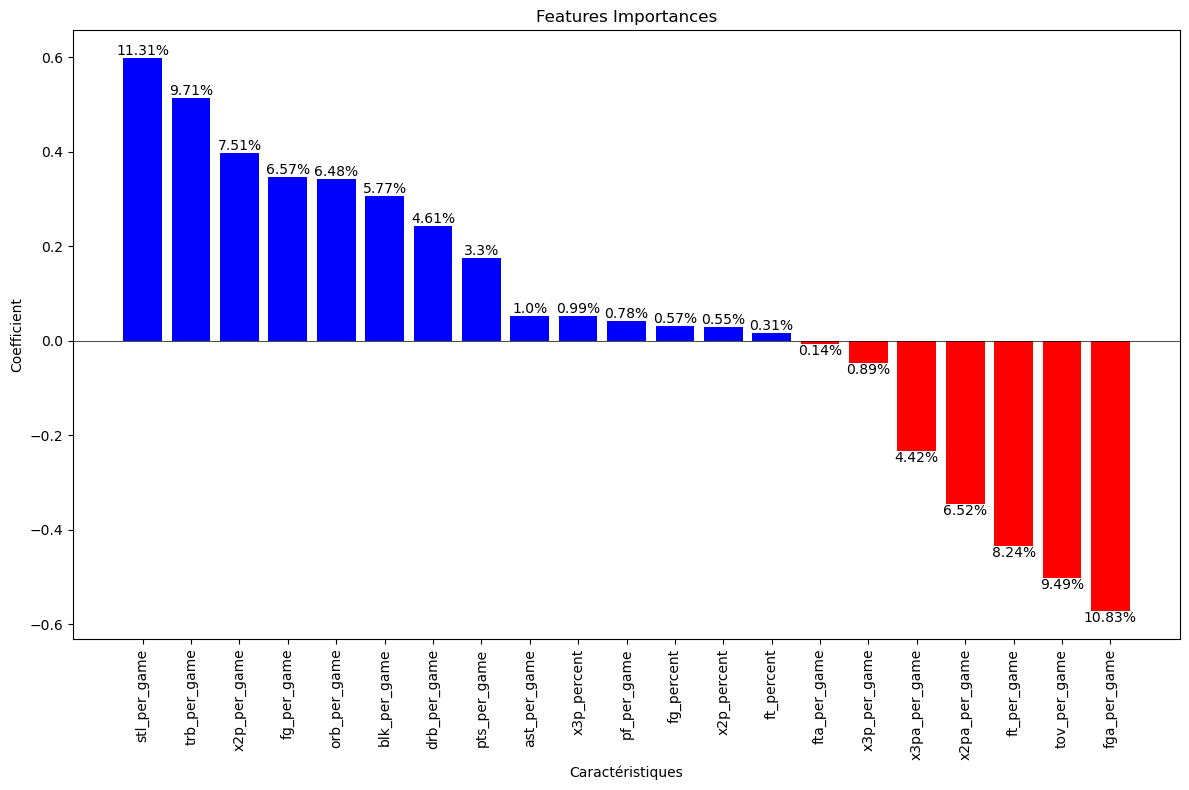

In [81]:
import matplotlib.pyplot as plt

# Données
features = ["stl_per_game", "trb_per_game", "x2p_per_game", "fg_per_game", "orb_per_game",
            "blk_per_game", "drb_per_game", "pts_per_game", "ast_per_game", "x3p_percent",
            "pf_per_game", "fg_percent", "x2p_percent", "ft_percent", "fta_per_game",
            "x3p_per_game", "x3pa_per_game", "x2pa_per_game", "ft_per_game", "tov_per_game",
            "fga_per_game"]
importances = [0.597986, 0.513166, 0.397124, 0.347306, 0.342476, 0.305112, 0.243571,
               0.174404, 0.052988, 0.052557, 0.041268, 0.030173, 0.028876, 0.016232,
               -0.007531, -0.046787, -0.233861, -0.344384, -0.435235, -0.501671, -0.572382]
importance_percentages = [11.31, 9.71, 7.51, 6.57, 6.48, 5.77, 4.61, 3.30, 1.00, 0.99,
                          0.78, 0.57, 0.55, 0.31, 0.14, 0.89, 4.42, 6.52, 8.24, 9.49, 10.83]

# Couleurs pour les valeurs positives et négatives
colors = ['blue' if imp >= 0 else 'red' for imp in importances]

# Créer le graphique
plt.figure(figsize=(12, 8))
bars = plt.bar(features, importances, color=colors)

# Ajouter les annotations des pourcentages
for bar, percentage in zip(bars, importance_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{percentage}%", ha='center', va='bottom' if height >= 0 else 'top')

# Ligne à 0
plt.axhline(0, color='black', linewidth=0.5)

plt.title("Features Importances")
plt.xlabel("Caractéristiques")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


                                                        MODELE REGRESSION LINEAIRE                                                          

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Calcul des métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 0.029342224576668557
R^2: 0.0991482136752262


In [83]:
from sklearn.linear_model import LogisticRegression

# Définir une nouvelle variable cible binaire pour les playoffs
threshold = 41  # Seuil de qualification à 41 victoires
df7['playoffs'] = df7['g'] >= threshold

# Sélection des caractéristiques
X = df7[['fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game', 
'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'ft_per_game', 'fta_per_game', 
'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game', 
'blk_per_game', 'tov_per_game', 'pf_per_game', 'pts_per_game']]
y = df7['playoffs']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = logistic_model.predict(X_test)

# Évaluation du modèle
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


c:\Users\yvann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn.metrics import r2_score

# Calcul du R^2 pour l'ensemble d'entraînement
r2_train = logistic_model.score(X_train, y_train)

# Calcul du R^2 pour l'ensemble de test
r2_test = logistic_model.score(X_test, y_test)

print("R^2 pour l'ensemble d'entraînement:", r2_train)
print("R^2 pour l'ensemble de test:", r2_test)


R^2 pour l'ensemble d'entraînement: 1.0
R^2 pour l'ensemble de test: 1.0


                                                   MODELE SUPPORT VECTOR MACHINES (SVM)                                                                 

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sélection des caractéristiques
X = df7[['fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game', 
'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'ft_per_game', 'fta_per_game', 
'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game', 'stl_per_game', 
'blk_per_game', 'tov_per_game', 'pf_per_game', 'pts_per_game']]
y = df7['champion_NBA']

# Diviser les données en ensemble de "train & test set"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle SVM
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)

# Calculer l'exactitude du modèle
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Exactitude du modèle SVM :", accuracy_svm)


Exactitude du modèle SVM : 0.9662921348314607


In [86]:
r2_train = model_svm.score(X_train, y_train)
print(f'R2 score (train set):', r2_train)

r2_test = model_svm.score(X_test, y_test)
print(f'R2 score (test set):', r2_test)


R2 score (train set): 0.9671052631578947
R2 score (test set): 0.9662921348314607


Caractéristiques importantes:
x2p_percent: 19.84%
ft_percent: 15.44%
orb_per_game: 11.16%
drb_per_game: 10.19%
trb_per_game: 8.90%
fg_per_game: 6.49%
fga_per_game: 6.10%
fg_percent: 5.77%
x3pa_per_game: 4.01%
x2pa_per_game: 3.60%
x3p_per_game: 2.88%
x2p_per_game: 2.54%
fta_per_game: 0.67%
stl_per_game: 0.60%
tov_per_game: 0.56%
pts_per_game: 0.48%
ft_per_game: 0.32%
x3p_percent: 0.18%
blk_per_game: 0.14%
ast_per_game: 0.11%
pf_per_game: 0.01%


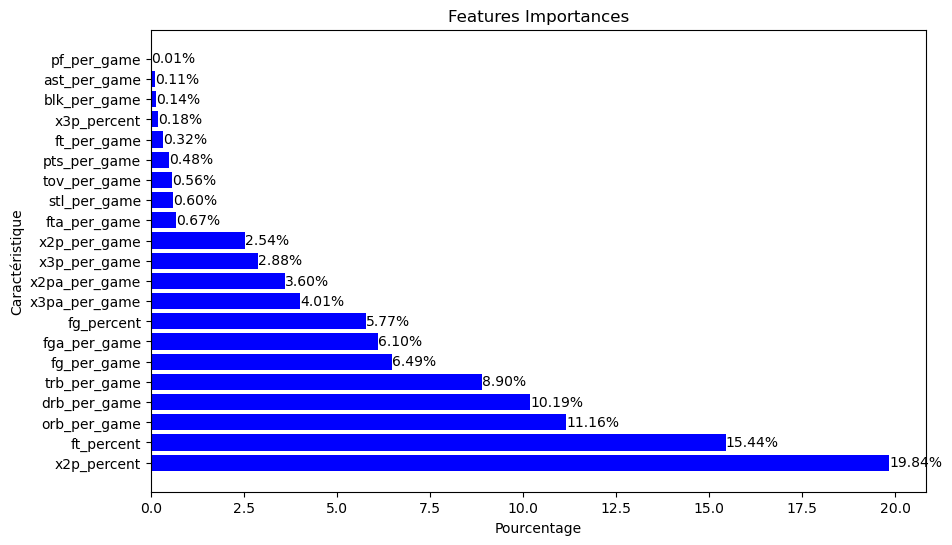

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Obtenir les vecteurs de support
support_vectors = model_svm.support_vectors_

# Calculer les poids des caractéristiques
weights = np.abs(model_svm.coef_.flatten())

# Calculer le pourcentage de contribution de chaque caractéristique
total_weight = np.sum(weights)
percentage_weights = (weights / total_weight) * 100

# Associer les poids et les pourcentages aux noms des caractéristiques
feature_weights = dict(zip(X.columns, percentage_weights))

# Trier les caractéristiques par poids
sorted_feature_weights = sorted(feature_weights.items(), key=lambda x: x[1], reverse=True)

print("Caractéristiques importantes:")
for feature, percentage in sorted_feature_weights:
    print(f"{feature}: {percentage:.2f}%")

# Graphique 
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_feature_weights)), [val[1] for val in sorted_feature_weights], align='center', color='blue')
plt.yticks(range(len(sorted_feature_weights)), [val[0] for val in sorted_feature_weights])
plt.xlabel('Pourcentage')
plt.ylabel('Caractéristique')
plt.title('Features Importances')
# Ajouter les pourcentages au-dessus de chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}%", 
             va='center', ha='left', fontsize=10)
plt.show()


                                                          DECISION TREE                                                                                      

In [88]:
from sklearn.tree import DecisionTreeClassifier

# Initialiser et entraîner le modèle "Decision Tree"
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Faire des prédictions
predictions_tree = model_tree.predict(X_test)

# Calculer l'exactitude du modèle
accuracy_tree = accuracy_score(y_test, predictions_tree)
print("Exactitude du modèle decision tree :", accuracy_tree)


Exactitude du modèle decision tree : 0.9438202247191011


In [89]:
from sklearn.metrics import r2_score

# Calcul du R2 score sur l'ensemble de test
r2_score_test_tree = r2_score(y_test, predictions_tree)
print("R2 score (test set) - Decision Tree:", r2_score_test_tree)

# Calcul du R2 score sur l'ensemble d'entraînement
predictions_train_tree = model_tree.predict(X_train)
r2_score_train_tree = r2_score(y_train, predictions_train_tree)
print("R2 score (training set) - Decision Tree:", r2_score_train_tree)


R2 score (test set) - Decision Tree: -0.7248062015503878
R2 score (training set) - Decision Tree: 1.0


Caractéristiques importantes:
drb_per_game: 0.15 (14.89%)
trb_per_game: 0.11 (11.08%)
fga_per_game: 0.11 (10.65%)
fg_percent: 0.09 (9.48%)
pf_per_game: 0.07 (6.83%)
pts_per_game: 0.07 (6.53%)
ast_per_game: 0.06 (6.35%)
x2pa_per_game: 0.06 (6.08%)
x3p_percent: 0.06 (5.55%)
stl_per_game: 0.04 (4.17%)
x2p_percent: 0.04 (4.06%)
x2p_per_game: 0.04 (4.01%)
ft_percent: 0.04 (3.55%)
tov_per_game: 0.02 (2.36%)
fg_per_game: 0.02 (1.97%)
orb_per_game: 0.02 (1.55%)
blk_per_game: 0.01 (0.89%)
x3p_per_game: 0.00 (0.00%)
x3pa_per_game: 0.00 (0.00%)
ft_per_game: 0.00 (0.00%)
fta_per_game: 0.00 (0.00%)


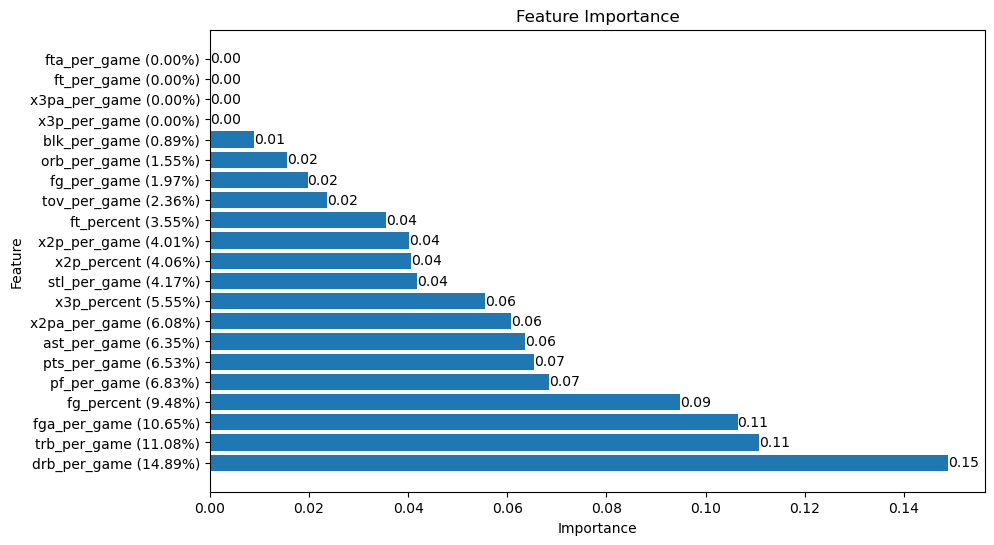

In [90]:
import matplotlib.pyplot as plt

# Obtenir les importances des caractéristiques
importances = model_tree.feature_importances_

# Calculer le pourcentage de contribution de chaque caractéristique
total_importance = np.sum(importances)
percentage_importances = (importances / total_importance) * 100

# Associer les importances et les pourcentages aux noms des caractéristiques
feature_importance = dict(zip(X.columns, zip(importances, percentage_importances)))

# Trier les caractéristiques par importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1][0], reverse=True)

# Afficher les caractéristiques importantes
print("Caractéristiques importantes:")
for feature, (importance, percentage) in sorted_feature_importance:
    print(f"{feature}: {importance:.2f} ({percentage:.2f}%)")

# Graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_feature_importance)), [val[1][0] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [f"{val[0]} ({val[1][1]:.2f}%)" for val in sorted_feature_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
# Ajouter les pourcentages au-dessus de chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}", 
             va='center', ha='left', fontsize=10)
plt.show()


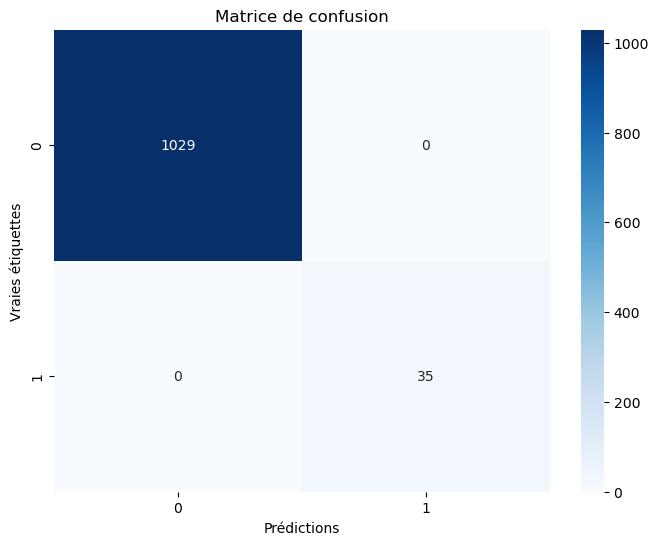

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies étiquettes')
    plt.title('Matrice de confusion')
    plt.show()

# Faire des prédictions sur les données d'entraînement
predictions_train = model_tree.predict(X_train)

# Créer une liste des étiquettes uniques
labels = np.unique(y_train)

# Afficher la matrice de confusion
plot_confusion_matrix(y_train, predictions_train, labels)


                                                         RANDOM FOREST                                                                                      

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle de "Random Forest"
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

# Faire des prédictions
predictions_forest = model_forest.predict(X_test)

# Calculer l'exactitude du modèle
accuracy_forest = accuracy_score(y_test, predictions_forest)
print("Exactitude du modèle de Random Forest :", accuracy_forest)


Exactitude du modèle de Random Forest : 0.9662921348314607


In [93]:
from sklearn.metrics import r2_score

# Calcul du R2 score sur l'ensemble de test
r2_score_test_forest = r2_score(y_test, predictions_forest)
print("R2 score (test set) - Random Forest:", r2_score_test_forest)

# Calcul du R2 score sur l'ensemble d'entraînement
predictions_train_forest = model_forest.predict(X_train)
r2_score_train_forest = r2_score(y_train, predictions_train_forest)
print("R2 score (training set) - Random Forest:", r2_score_train_forest)


R2 score (test set) - Random Forest: -0.03488372093023262
R2 score (training set) - Random Forest: 1.0


Caractéristiques importantes:
fg_percent: 0.09 (8.55%)
x3p_percent: 0.06 (5.70%)
stl_per_game: 0.06 (5.68%)
ast_per_game: 0.06 (5.61%)
fga_per_game: 0.05 (5.31%)
blk_per_game: 0.05 (5.26%)
x2p_percent: 0.05 (5.13%)
pts_per_game: 0.05 (5.09%)
x3pa_per_game: 0.05 (4.80%)
trb_per_game: 0.05 (4.72%)
orb_per_game: 0.05 (4.66%)
x2pa_per_game: 0.04 (4.30%)
x2p_per_game: 0.04 (4.23%)
x3p_per_game: 0.04 (4.16%)
drb_per_game: 0.04 (4.16%)
pf_per_game: 0.04 (4.15%)
ft_percent: 0.04 (4.06%)
fg_per_game: 0.04 (3.82%)
tov_per_game: 0.04 (3.81%)
fta_per_game: 0.04 (3.55%)
ft_per_game: 0.03 (3.22%)


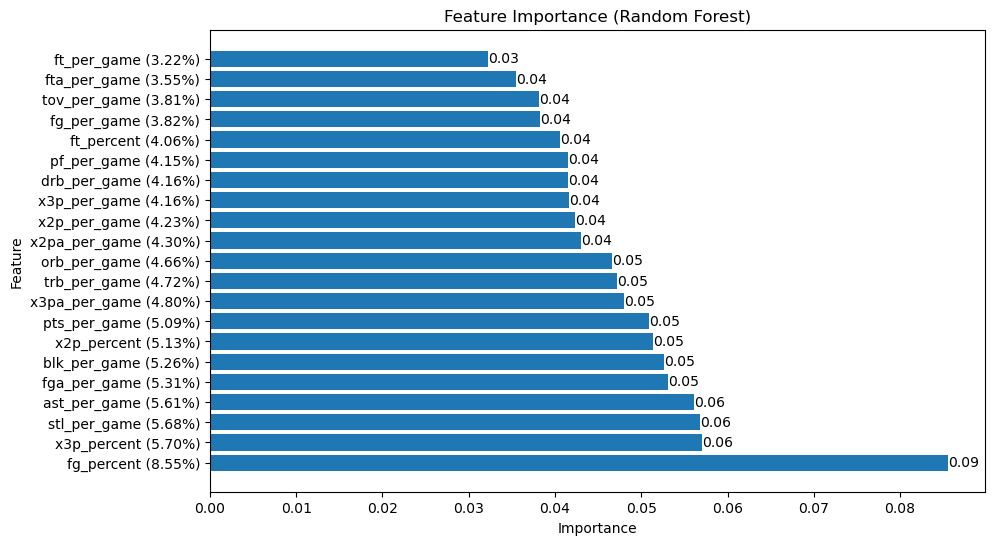

In [94]:
import matplotlib.pyplot as plt

# Obtenir les importances des caractéristiques
importances = model_forest.feature_importances_

# Calculer le pourcentage de contribution de chaque caractéristique
total_importance = np.sum(importances)
percentage_importances = (importances / total_importance) * 100

# Associer les importances et les pourcentages aux noms des caractéristiques
feature_importance = dict(zip(X.columns, zip(importances, percentage_importances)))

# Trier les caractéristiques par importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1][0], reverse=True)

# Afficher les caractéristiques importantes
print("Caractéristiques importantes:")
for feature, (importance, percentage) in sorted_feature_importance:
    print(f"{feature}: {importance:.2f} ({percentage:.2f}%)")

# Afficher les importances des caractéristiques sous forme de bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_feature_importance)), [val[1][0] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [f"{val[0]} ({val[1][1]:.2f}%)" for val in sorted_feature_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
# Ajouter les pourcentages au-dessus de chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}", 
             va='center', ha='left', fontsize=10)
plt.show()


Train model...
...Done.
Train score:  0.9464285714285714
Test score:  0.9176029962546817
--- Assessment of performances ---


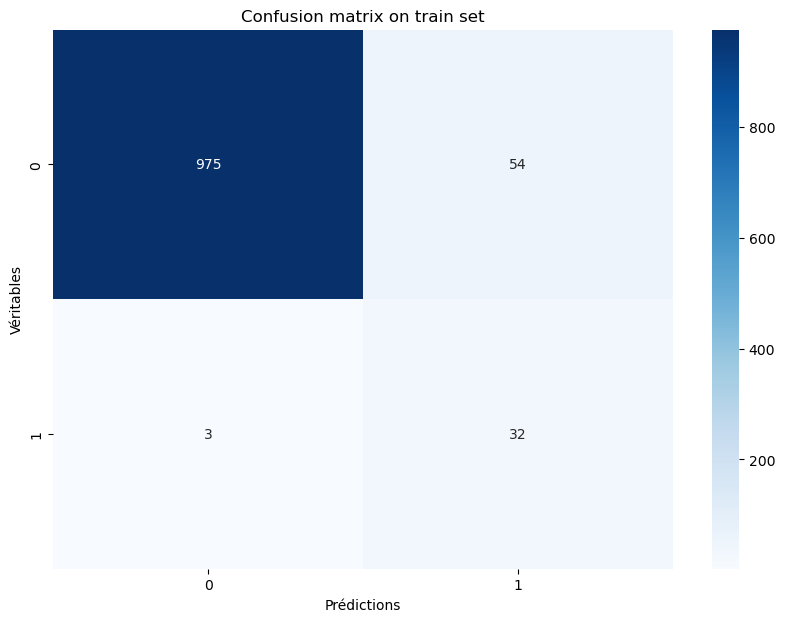

accuracy-score on train set :  0.9464285714285714


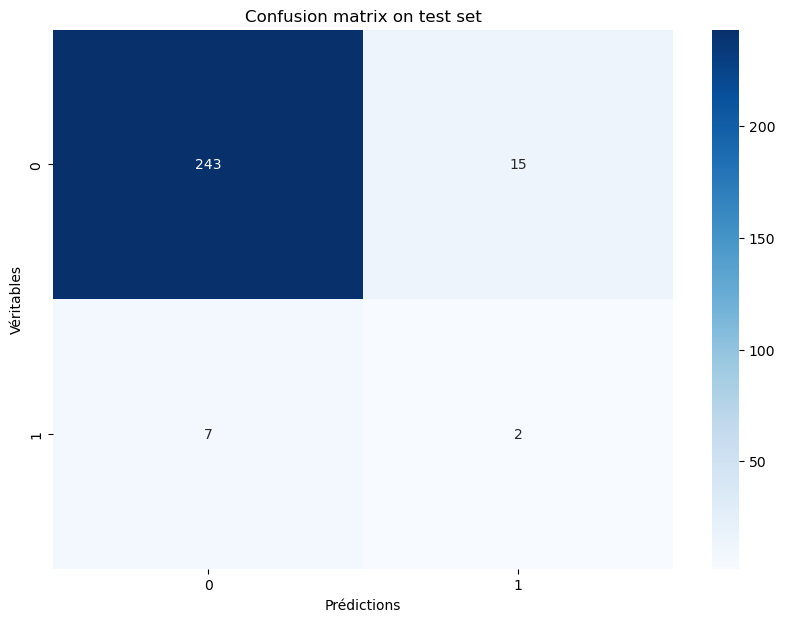

accuracy-score on test set :  0.9176029962546817


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Entraîner le modèle
print("Train model...")
classifier = RandomForestClassifier(min_samples_split=80, class_weight="balanced")
classifier.fit(X_train, y_train)  # This step is the actual training!
print("...Done.")

print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

### Évaluation des performances ###
print("--- Assessment of performances ---")

# Matrice de confusion pour l'ensemble d'entraînement
train_predictions = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, train_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion matrix on train set")
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()
print("accuracy-score on train set : ", accuracy_score(y_train, train_predictions))

# Matrice de confusion pour l'ensemble de test
test_predictions = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion matrix on test set")
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()
print("accuracy-score on test set : ", accuracy_score(y_test, test_predictions))


                                                      GRADIENT BOOSTING MACHINES (GBM)                                                                

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialiser et entraîner le modèle "GBM"
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)

# Faire des prédictions
predictions_gbm = model_gbm.predict(X_test)

# Calculer l'exactitude du modèle
accuracy_gbm = accuracy_score(y_test, predictions_gbm)
print("Exactitude du modèle GBM :", accuracy_gbm)


Exactitude du modèle GBM : 0.9588014981273408


In [97]:
from sklearn.metrics import r2_score

# Calcul du R2 score sur l'ensemble de test
r2_score_test_gbm = r2_score(y_test, predictions_gbm)
print("R2 score (test set) - GBM:", r2_score_test_gbm)

# Calcul du R2 score sur l'ensemble d'entraînement
predictions_train_gbm = model_gbm.predict(X_train)
r2_score_train_gbm = r2_score(y_train, predictions_train_gbm)
print("R2 score (training set) - GBM:", r2_score_train_gbm)


R2 score (test set) - GBM: -0.2648578811369511
R2 score (training set) - GBM: 1.0


Caractéristiques importantes:
fg_percent: 0.11 (11.43%)
trb_per_game: 0.10 (9.58%)
stl_per_game: 0.08 (8.48%)
fga_per_game: 0.08 (7.57%)
blk_per_game: 0.07 (6.80%)
orb_per_game: 0.06 (6.28%)
pf_per_game: 0.06 (6.10%)
drb_per_game: 0.05 (5.44%)
pts_per_game: 0.05 (5.35%)
x2p_percent: 0.05 (4.59%)
ft_percent: 0.04 (4.47%)
x2pa_per_game: 0.04 (4.09%)
x3p_percent: 0.04 (3.70%)
ast_per_game: 0.03 (3.23%)
ft_per_game: 0.03 (3.05%)
tov_per_game: 0.03 (2.53%)
fg_per_game: 0.02 (2.34%)
x2p_per_game: 0.02 (2.09%)
x3pa_per_game: 0.01 (1.22%)
fta_per_game: 0.01 (0.97%)
x3p_per_game: 0.01 (0.67%)


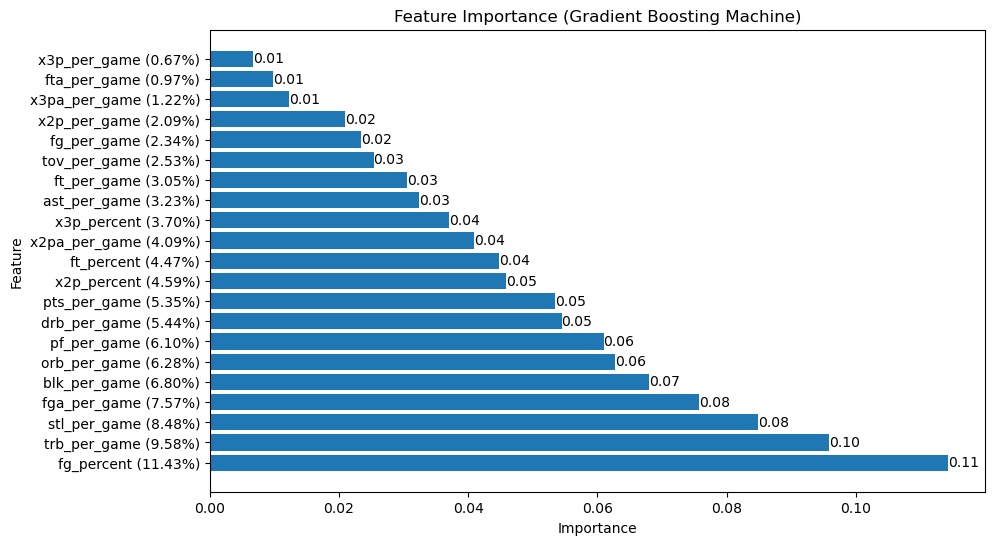

In [98]:
import matplotlib.pyplot as plt

# Obtenir les importances des caractéristiques
importances = model_gbm.feature_importances_

# Calculer le pourcentage de contribution de chaque caractéristique
total_importance = np.sum(importances)
percentage_importances = (importances / total_importance) * 100

# Associer les importances et les pourcentages aux noms des caractéristiques
feature_importance = dict(zip(X.columns, zip(importances, percentage_importances)))

# Trier les caractéristiques par importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1][0], reverse=True)

# Afficher les caractéristiques importantes
print("Caractéristiques importantes:")
for feature, (importance, percentage) in sorted_feature_importance:
    print(f"{feature}: {importance:.2f} ({percentage:.2f}%)")

# Graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_feature_importance)), [val[1][0] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [f"{val[0]} ({val[1][1]:.2f}%)" for val in sorted_feature_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Gradient Boosting Machine)')
# Ajouter les pourcentages au-dessus de chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}", 
             va='center', ha='left', fontsize=10)
plt.show()


Exactitude du modèle GBM : 0.9588014981273408


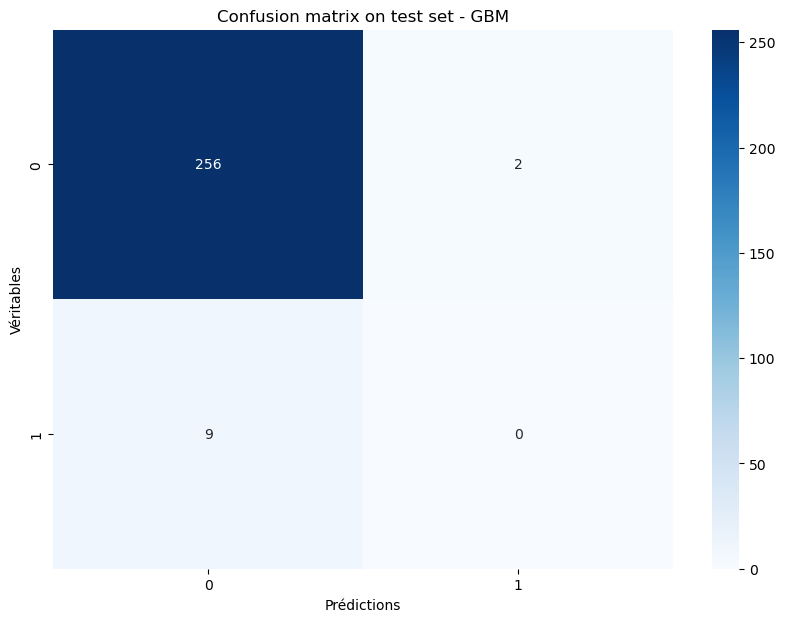

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Initialiser et entraîner le modèle "GBM"
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)

# Faire des prédictions
predictions_gbm = model_gbm.predict(X_test)

# Calculer l'exactitude du modèle
accuracy_gbm = accuracy_score(y_test, predictions_gbm)
print("Exactitude du modèle GBM :", accuracy_gbm)

# Calculer la matrice de confusion
cm_gbm = confusion_matrix(y_test, predictions_gbm)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion matrix on test set - GBM")
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()


In [100]:
from sklearn.metrics import classification_report

# Générer le rapport de classification
report = classification_report(y_test, predictions_gbm)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       258
           1       0.00      0.00      0.00         9

    accuracy                           0.96       267
   macro avg       0.48      0.50      0.49       267
weighted avg       0.93      0.96      0.95       267

